In [1]:
import pandas as pd
pd.options.display.float_format = '{:.2f}'.format #turn off scientific notation
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
from scipy.stats import linregress

## Read Cleaned Zillow Data

In [25]:
#read Zillow 3 bedroom data by county into pandas dataframe 
file = "output files/zillow_clean_df.csv" 
zillow_df = pd.read_csv(file, index_col = 0) 
#zillow_df = pd.read_csv(file) 
zillow_df.head()

,Los Angeles County,Fresno County,San Francisco County,Shasta County
2014 Avg Price,456951.25,180313.22,1194854.92,202065.47
2015 Avg Price,482374.33,191649.06,1292884.22,216334.31
2016 Avg Price,518062.94,203774.64,1388945.64,226238.28
2017 Avg Price,555362.75,220687.50,1471771.03,241436.89
2018 Avg Price,596094.53,238799.28,1620575.75,253039.00


## Read Income Data

In [26]:
income_df=pd.read_csv("output files/income_df.csv", index_col = 0) 
income_df.head()

,Los Angeles County,Fresno County,San Francisco County,Shasta County
2014 Income,50730,36448,97498,38410
2015 Income,53521,38323,103529,40882
2016 Income,57127,40327,114697,43412
2017 Income,59058,41137,121778,44480
2018 Income,62224,43084,130696,46582


## Plot Income vs. Housing Data

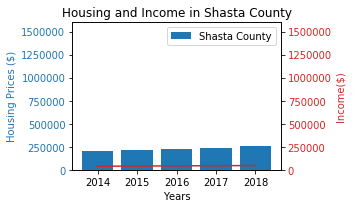

In [27]:
#plot Shasta income and housing price with 2 y axis
x=[2014, 2015, 2016, 2017, 2018]
y1line = zillow_df.loc[:,"Shasta County"]
y2bar = income_df.loc[:, "Shasta County"]

fig, ax1 = plt.subplots(figsize=(5,3))

color = 'tab:blue'
ax1.set_xlabel('Years')
ax1.set_ylim(0, 1600000)
ax1.set_ylabel('Housing Prices ($)', color=color)
ax1.set_title('Housing and Income in Shasta County')
ax1.bar(x, y1line, color=color) 
ax1.tick_params(axis='y', labelcolor=color)
ax1.legend(['Shasta County'], facecolor='w')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylim(0, 1600000) #set limit on second axis to same scale as first axis
color = 'tab:red'
ax2.set_ylabel('Income($)', color=color)  # we already handled the x-label with ax1
ax2.plot(x, y2bar, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig("IncomandHousingPricesinShastaCounty.png")
plt.show()

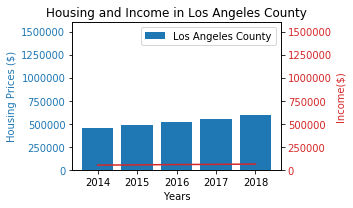

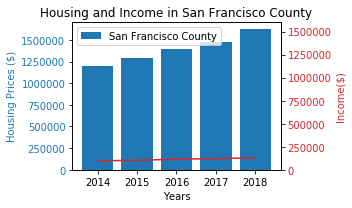

In [28]:
#plot LA income and housing price with 2 y axis
x=[2014, 2015, 2016, 2017, 2018]
y1line = zillow_df.loc[:,"Los Angeles County"]
y2bar = income_df.loc[:, "Los Angeles County"]

fig, ax1 = plt.subplots(figsize=(5,3))

color = 'tab:blue'
ax1.set_xlabel('Years')
ax1.set_ylim(0, 1600000)
ax1.set_ylabel('Housing Prices ($)', color=color)
ax1.set_title('Housing and Income in Los Angeles County')
ax1.bar(x, y1line, color=color) 
ax1.tick_params(axis='y', labelcolor=color)
ax1.legend(['Los Angeles County'], facecolor='w')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylim(0, 1600000) #set limit on second axis to same scale as first axis
color = 'tab:red'
ax2.set_ylabel('Income($)', color=color)  # we already handled the x-label with ax1
ax2.plot(x, y2bar, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig("output images/Income_HousingPrices_LACounty.png")
plt.show()

#plot SF income and housing price with 2 y axis
fig, ax1 = plt.subplots(figsize=(5,3))

y1line = zillow_df.loc[:,"San Francisco County"]
y2bar = income_df.loc[:, "San Francisco County"]
color = 'tab:blue'
ax1.set_xlabel('Years')
ax1.set_ylabel('Housing Prices ($)', color=color)
ax1.set_title('Housing and Income in San Francisco County')
ax1.bar(x, y1line, color=color) 
ax1.tick_params(axis='y', labelcolor=color)
ax1.legend(['San Francisco County'], facecolor='w')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylim(0, 1600000) #set limit on second axis to same scale as first axis
color = 'tab:red'
ax2.set_ylabel('Income($)', color=color)  # we already handled the x-label with ax1
ax2.plot(x, y2bar, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig("output images/Income_HousingPrices_SFCounty.png")
plt.show()

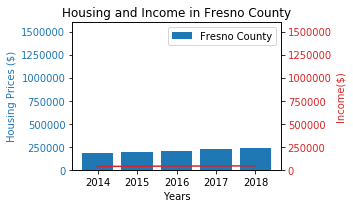

In [29]:
#plot Fresno income and housing price with 2 y axis
x=[2014, 2015, 2016, 2017, 2018]
y1line = zillow_df.loc[:,"Fresno County"]
y2bar = income_df.loc[:, "Fresno County"]

fig, ax1 = plt.subplots(figsize=(5,3))

color = 'tab:blue'
ax1.set_xlabel('Years')
ax1.set_ylim(0, 1600000)
ax1.set_ylabel('Housing Prices ($)', color=color)
ax1.set_title('Housing and Income in Fresno County')
ax1.bar(x, y1line, color=color) 
ax1.tick_params(axis='y', labelcolor=color)
ax1.legend(['Fresno County'], facecolor='w')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylim(0, 1600000) #set limit on second axis to same scale as first axis
color = 'tab:red'
ax2.set_ylabel('Income($)', color=color)  # we already handled the x-label with ax1
ax2.plot(x, y2bar, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig("output images/Income_HousingPrices_FresnoCounty.png")
plt.show()

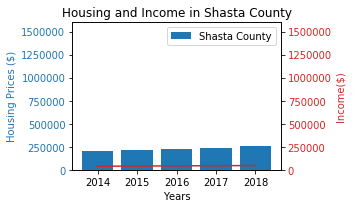

In [30]:
#plot Shasta income and housing price with 2 y axis
x=[2014, 2015, 2016, 2017, 2018]
y1line = zillow_df.loc[:,"Shasta County"]
y2bar = income_df.loc[:, "Shasta County"]

fig, ax1 = plt.subplots(figsize=(5,3))

color = 'tab:blue'
ax1.set_xlabel('Years')
ax1.set_ylim(0, 1600000)
ax1.set_ylabel('Housing Prices ($)', color=color)
ax1.set_title('Housing and Income in Shasta County')
ax1.bar(x, y1line, color=color) 
ax1.tick_params(axis='y', labelcolor=color)
ax1.legend(['Shasta County'], facecolor='w')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylim(0, 1600000) #set limit on second axis to same scale as first axis
color = 'tab:red'
ax2.set_ylabel('Income($)', color=color)  # we already handled the x-label with ax1
ax2.plot(x, y2bar, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig("output images/Income_HousingPrices_ShastaCounty.png")
plt.show()

## Plot Income vs. Housing Price Scatter

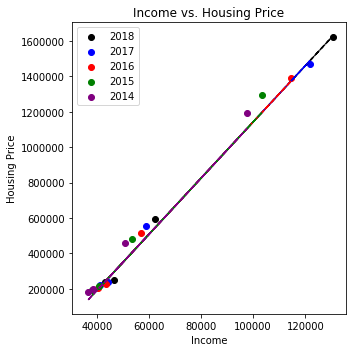

In [31]:
#Create Scatter plot of all counties all years
# Show linear relationship between Income and Housing Price
fig, ax1 = plt.subplots(figsize=(5,5))

#2018
x_2018= income_df.loc["2018 Income"]
y_2018 = zillow_df.loc["2018 Avg Price"]
ax1.scatter(x_2018, y_2018, color = "black", label = "2018")
#set line
(slope, intercept, _, _, _) = linregress(x_2018, y_2018)
fit = slope * x_2018 + intercept
ax1.plot(x_2018, fit, 'b--', color="black")

#2017
x_2017 = income_df.loc["2017 Income"]
y_2017 = zillow_df.loc["2017 Avg Price"]
ax1.scatter(x_2017, y_2017, color = "blue", label = "2017")
fit = slope * x_2017 + intercept
ax1.plot(x_2017, fit, 'b--', color="blue")

#2016
x_2016 = income_df.loc["2016 Income"]
y_2016 = zillow_df.loc["2016 Avg Price"]
ax1.scatter(x_2016, y_2016, color = "red", label = "2016")
fit = slope * x_2016 + intercept
ax1.plot(x_2016, fit, 'b--', color="red")

#2015
x_2015 = income_df.loc["2015 Income"]
y_2015 = zillow_df.loc["2015 Avg Price"]
ax1.scatter(x_2015, y_2015, color = "green", label = "2015")
fit = slope * x_2015 + intercept
ax1.plot(x_2015, fit, 'b--', color="green")

#2014
x_2014 = income_df.loc["2014 Income"]
y_2014 = zillow_df.loc["2014 Avg Price"]
ax1.scatter(x_2014, y_2014, color = "purple", label = "2014")
fit = slope * x_2014 + intercept
ax1.plot(x_2014, fit, 'b--', color="purple")

ax1.set_xlabel("Income")
ax1.set_ylabel("Housing Price")
ax1.set_title("Income vs. Housing Price")
fig.tight_layout()
plt.legend()
plt.savefig ("output images/Income_Housing_Scatter_Regression.png")
plt.show()

In [32]:
#Read Rental Data 
rental_df = pd.read_csv("output files/rentals4counties.csv", index_col = 0)
rental_df.head()

,Los Angeles County,San Francisco County,Fresno County,Shasta County
0,,,,
Average 2014 Rentals,2376.25,5374.17,1106.04,1161.25
Average 2015 Rentals,2711.67,5978.54,1180.00,1243.12
Average 2016 Rentals,2827.50,5685.04,1239.58,1250.42
Average 2017 Rentals,3020.42,5446.25,1337.71,1300.42
Average 2018 Rentals,3121.62,5498.58,1424.38,1390.42


## Plot Rental vs. Housing Data

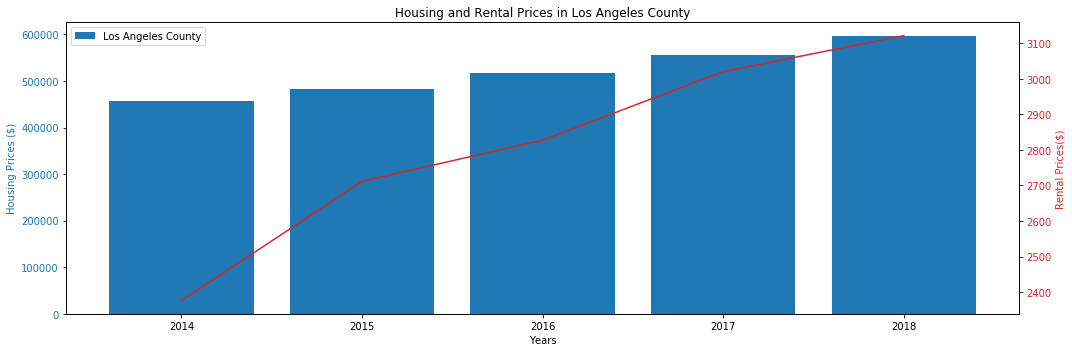

In [44]:
#plot LA rental and housing price with 2 y axis
x= ['2014','2015', '2016', '2017', '2018']
y1line = zillow_df["Los Angeles County"]
y2bar = rental_df["Los Angeles County"]

fig, ax1 = plt.subplots(figsize=(15,5))

color = 'tab:blue'
ax1.set_xlabel('Years')
ax1.set_ylabel('Housing Prices ($)', color=color)
ax1.set_title('Housing and Rental Prices in Los Angeles County')
ax1.bar(x, y1line, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.legend(['Los Angeles County'], facecolor='w')
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:red'
ax2.set_ylabel('Rental Prices($)', color=color)  # we already handled the x-label with ax1
ax2.plot(x, y2bar, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig("output images/Rental_HousingPricesi_LACounty.png")
plt.show()

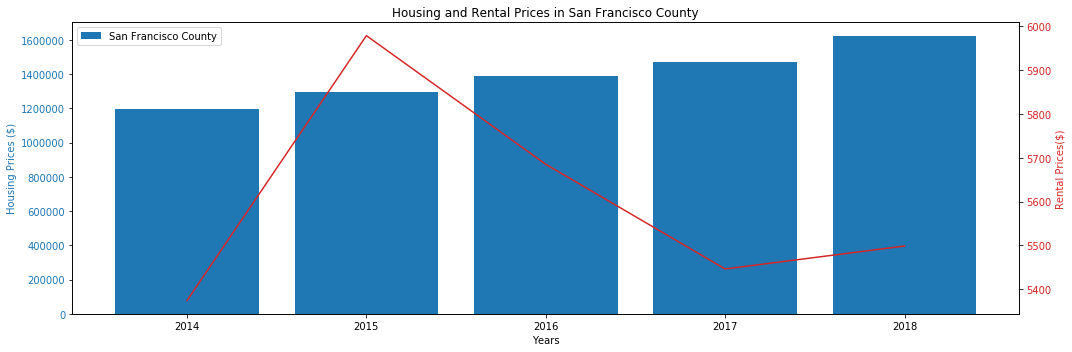

In [45]:
#plot San Francisco rental and housing price with 2 y axis
x= ['2014','2015', '2016', '2017', '2018']
y1line = zillow_df["San Francisco County"]
y2bar = rental_df["San Francisco County"]

fig, ax1 = plt.subplots(figsize=(15,5))

color = 'tab:blue'
ax1.set_xlabel('Years')
ax1.set_ylabel('Housing Prices ($)', color=color)
ax1.set_title('Housing and Rental Prices in San Francisco County')
ax1.bar(x, y1line, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.legend(['San Francisco County'], facecolor='w')
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:red'
ax2.set_ylabel('Rental Prices($)', color=color)  # we already handled the x-label with ax1
ax2.plot(x, y2bar, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig("output images/Rental_HousingPricesi_SFCounty.png")
plt.show()

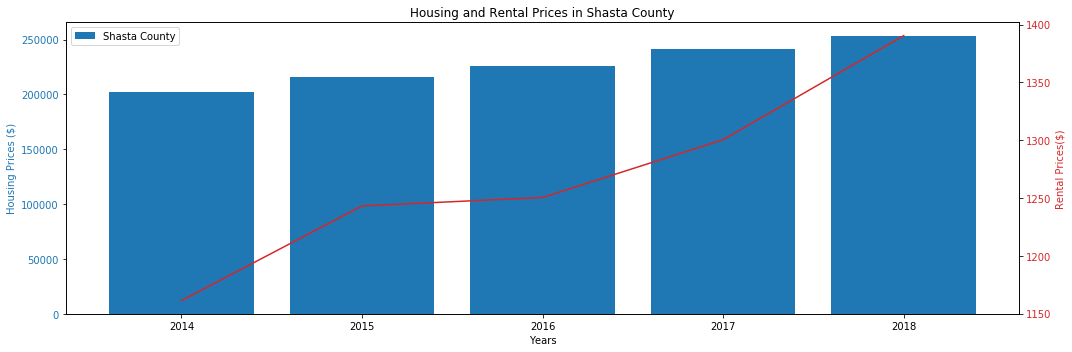

In [46]:
#plot LA rental and housing price with 2 y axis
x= ['2014','2015', '2016', '2017', '2018']
y1line = zillow_df["Shasta County"]
y2bar = rental_df["Shasta County"]

fig, ax1 = plt.subplots(figsize=(15,5))

color = 'tab:blue'
ax1.set_xlabel('Years')
ax1.set_ylabel('Housing Prices ($)', color=color)
ax1.bar(x, y1line, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.legend(['Shasta County'], facecolor='w')
ax1.set_title('Housing and Rental Prices in Shasta County')
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:red'
ax2.set_ylabel('Rental Prices($)', color=color)  # we already handled the x-label with ax1
ax2.plot(x, y2bar, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig("output images/Rental_HousingPrices_ShastaCounty.png")
plt.show()

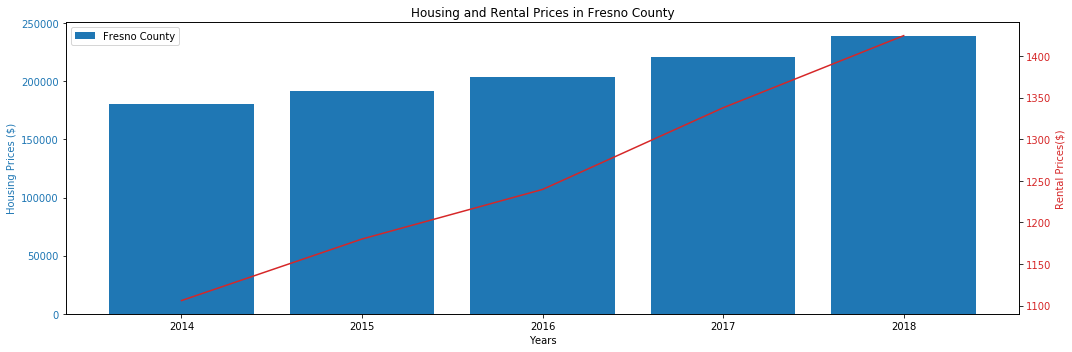

In [47]:
x= ['2014','2015', '2016', '2017', '2018']
y1line = zillow_df["Fresno County"]
y2bar = rental_df["Fresno County"]

fig, ax1 = plt.subplots(figsize=(15,5))

color = 'tab:blue'
ax1.set_xlabel('Years')
ax1.set_ylabel('Housing Prices ($)', color=color)
ax1.bar(x, y1line, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.legend(['Fresno County'], facecolor='w')
ax1.set_title('Housing and Rental Prices in Fresno County')
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:red'
ax2.set_ylabel('Rental Prices($)', color=color)  # we already handled the x-label with ax1
ax2.plot(x, y2bar, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig("output images/Rental_HousingPrices_FresnoCounty.png")
plt.show()

## Rental averages for 4 counties

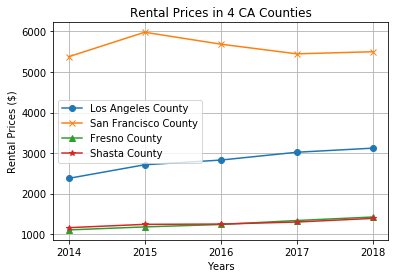

In [48]:
x= ['2014','2015', '2016', '2017', '2018']
plt.plot(x, rental_df["Los Angeles County"], marker="o", label = "Los Angeles County")
plt.plot(x, rental_df["San Francisco County"], marker="x", label = "San Francisco County")
plt.plot(x, rental_df["Fresno County"], marker="^", label = "Fresno County")
plt.plot(x, rental_df["Shasta County"], marker="*", label = "Shasta County")

# Incorporate the other graph properties
plt.title("Rental Prices in 4 CA Counties")
plt.ylabel("Rental Prices ($)")
plt.xlabel("Years")
plt.grid(True)
plt.legend(loc="best")

#plt.xlim(0,4)
#plt.ylim(950,6500)
#plt.figure(figsize=(20,10))

plt.savefig("output images/Rental_Prices_4Counties.png")
plt.show()